In [1]:
import os
import cv2
import numpy as np
from skimage.filters import sobel
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
folder_path = '/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/01-minor'

image_array_list = []
label_list = []

In [3]:
for filename in os.listdir(folder_path):
    # Load the image using OpenCV
    img = cv2.imread(os.path.join(folder_path, filename))
    # Convert the image to a NumPy array and append it to the list
    image_array_list.append(np.array(img))
    # Extract the label from the file name (assuming file name format is "label_filename.jpg")
    label = 0
    # Append the label to the label list
    label_list.append(label)

    
label_array = np.array(label_list)


In [4]:
label_array


array([0, 0, 0, ..., 0, 0, 0])

In [5]:
np.savez('/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/01-minor_images.npz', images=image_array_list, labels=label_array)


In [6]:
my_arrays_minor = np.load("/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/01-minor_images.npz", allow_pickle=True)


In [7]:
print(my_arrays_minor['images'].shape)


(2480,)


In [8]:
print(my_arrays_minor['labels'].shape)


(2480,)


In [9]:
folder_path = '/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/02-moderate'

image_array_list = []
label_list = []

In [10]:
for filename in os.listdir(folder_path):
    # Load the image using OpenCV
    img = cv2.imread(os.path.join(folder_path, filename))
    # Convert the image to a NumPy array and append it to the list
    image_array_list.append(np.array(img))
    # Extract the label from the file name (assuming file name format is "label_filename.jpg")
    label = 1
    # Append the label to the label list
    label_list.append(label)

    
label_array = np.array(label_list)

In [11]:
np.savez('/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/02-moderate_images.npz', images=image_array_list, labels=label_array)


In [12]:
my_arrays_moderate = np.load("/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/02-moderate_images.npz", allow_pickle=True)


In [13]:
print(my_arrays_moderate['images'].shape)


(2523,)


In [14]:
print(my_arrays_moderate['labels'].shape)

(2523,)


In [15]:
folder_path = '/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/training/03-severe'

image_array_list = []
label_list = []

In [16]:
for filename in os.listdir(folder_path):
    # Load the image using OpenCV
    img = cv2.imread(os.path.join(folder_path, filename))
    # Convert the image to a NumPy array and append it to the list
    image_array_list.append(np.array(img))
    # Extract the label from the file name
    label = 2
    # Append the label to the label list
    label_list.append(label)

    
label_array = np.array(label_list)

In [18]:
np.savez('/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/02-severe_images.npz', images=image_array_list, labels=label_array)


In [19]:
my_arrays_severe = np.load("/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/02-severe_images.npz", allow_pickle=True)


In [20]:
print(my_arrays_severe['images'].shape)


(2563,)


In [21]:
combined_data = {}
for key in my_arrays_minor.keys():
    combined_data[key] = np.concatenate((my_arrays_minor[key], my_arrays_moderate[key], my_arrays_severe[key]), axis=None)

# Save the combined data to a new .npz file
np.savez('/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/car_final_data.npz', **combined_data)

In [22]:
my_arrays_final = np.load("/Users/rohitgulve/Documents/Applied_Machine_Learning/data3a/car_final_data.npz", allow_pickle=True)


In [24]:
print(my_arrays_final['images'].shape)


(7566,)


In [25]:
print(my_arrays_final['labels'].shape)


(7566,)


In [26]:
images = my_arrays_final['images']
labels = my_arrays_final['labels']

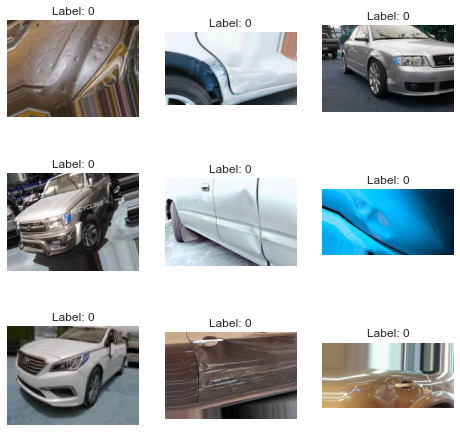

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')
plt.show()

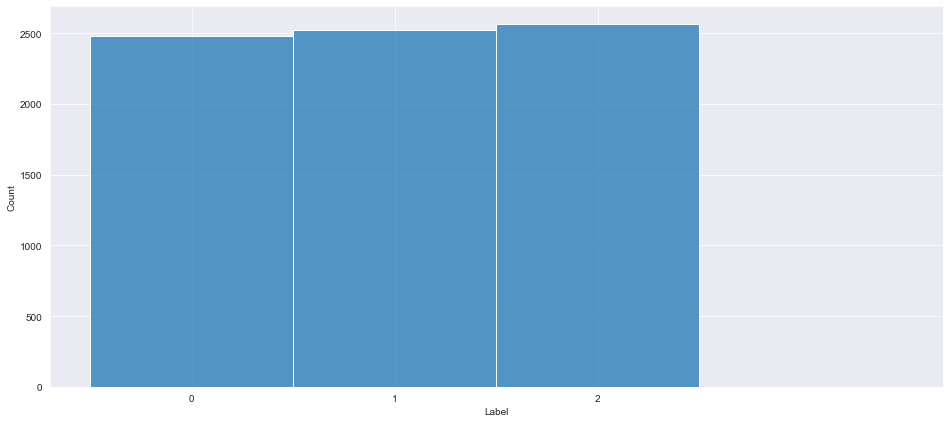

In [27]:
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(16,7))

sns.histplot(labels, bins=np.arange(5)-0.5, ax=ax)

ax.set_xticks(np.arange(3))
ax.set_xticklabels(['0', '1', '2'])
ax.set_xlabel('Label')
ax.set_ylabel('Count')

plt.show()

In [28]:
X = my_arrays_final['images']
y = my_arrays_final['labels']

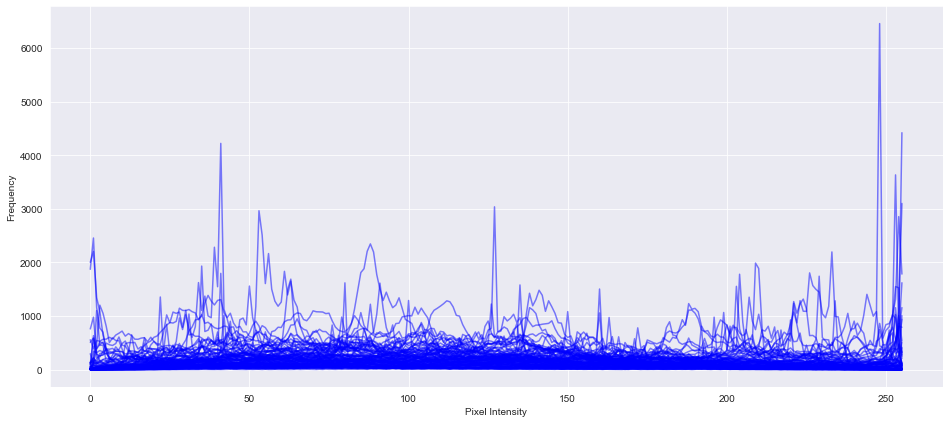

In [31]:
fig, axes = plt.subplots(figsize=(16,7))

histograms = []
for image in X:
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Calculate histogram of grayscale image
    hist, _ = np.histogram(gray_image, bins=256, range=(0, 256))
    # Add histogram to list
    histograms.append(hist)

# Convert list of histograms to numpy array
histograms = np.array(histograms)

# Visualize histograms for first 100 images
for i in range(100):
    plt.plot(histograms[i], color='blue', alpha=0.5)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Perform PCA to reduce the dimensionality of the histogram features
pca = PCA(n_components=2)
hist_pca = pca.fit_transform(histograms)


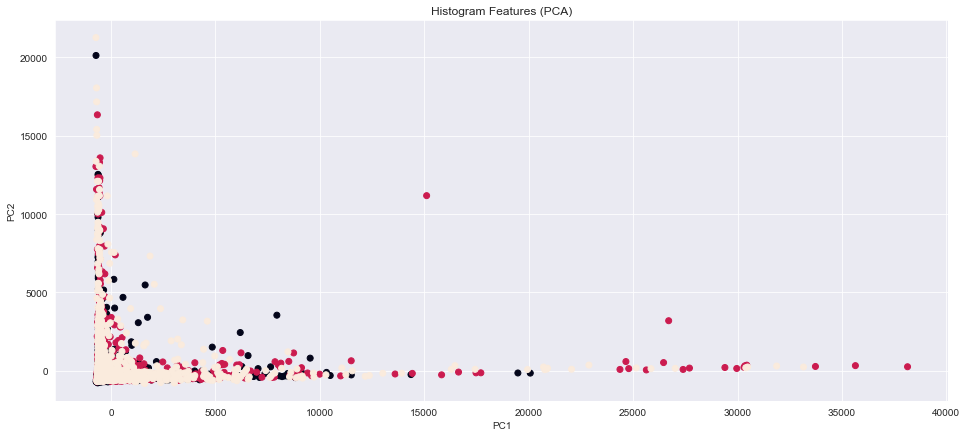

In [33]:
fig, axes = plt.subplots(figsize=(16,7))

# Plot the histogram features in 2D space using PCA
plt.scatter(hist_pca[:, 0], hist_pca[:, 1], c=y)
plt.title('Histogram Features (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [34]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.29170456 0.11116053]


In [35]:
# Perform t-SNE to visualize the histogram features in 2D space
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
hist_tsne = tsne.fit_transform(histograms)


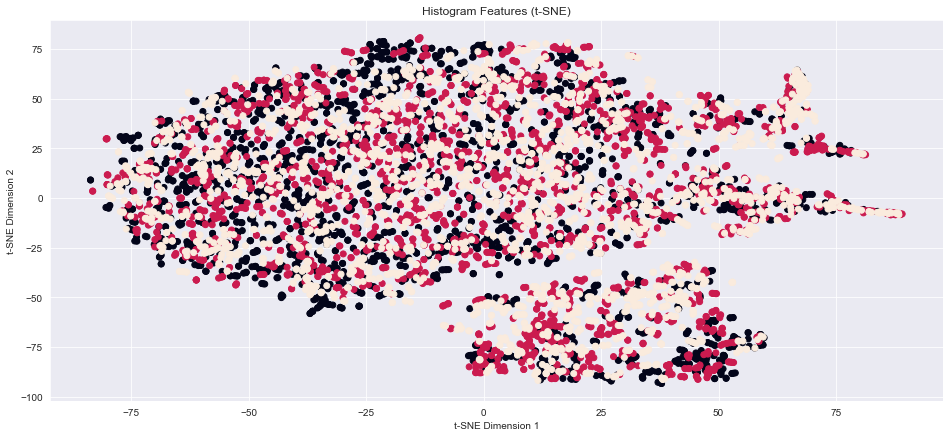

In [36]:
# Plot the histogram features in 2D space using t-SNE
fig, axes = plt.subplots(figsize=(16,7))
plt.scatter(hist_tsne[:, 0], hist_tsne[:, 1], c=y)
plt.title('Histogram Features (t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [37]:
# ! pip3 install opencv-python

In [42]:
# !pip install opencv-python==4.1.2.30

In [39]:
# !pip install --upgrade pip

In [40]:
# !pip install opencv-python

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6052,), (1514,), (6052,), (1514,))

In [ ]:
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)


In [ ]:
# # Calculate accuracy on the test set
# y_pred = rf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy on test set: {accuracy:.3f}")


In [ ]:
# # Get the feature importances
# importances = rf.feature_importances_


In [ ]:

# # Print the importance scores of the histogram bins
# for i, score in enumerate(importances):
#     print(f"Histogram bin {i}: {score:.3f}")

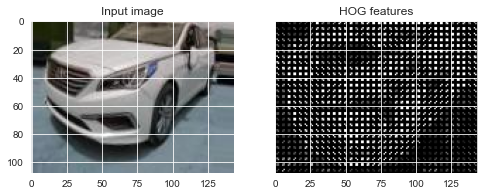

In [44]:
image = images[6]
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2), visualize=True, multichannel=True, channel_axis=-1)

# Rescale the HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Visualize the original image and the HOG features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG features')

plt.show()

In [45]:
# Initialize an array to store the color histograms for each image
bins = 8
histograms = np.zeros((len(images), bins * 3))


In [46]:
# Loop over each image in the dataset
for i in range(len(images)):
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(images[i], cv2.COLOR_RGB2HSV)

    # Calculate the color histograms for each channel (H, S, V)
    hist_h = cv2.calcHist([hsv], [0], None, [bins], [0, 180]).flatten()
    hist_s = cv2.calcHist([hsv], [1], None, [bins], [0, 256]).flatten()
    hist_v = cv2.calcHist([hsv], [2], None, [bins], [0, 256]).flatten()

    # Concatenate the color histograms into a single feature vector
    feature = np.concatenate([hist_h, hist_s, hist_v])
    histograms[i] = feature

# Print the shape of the histograms array
print(histograms.shape)

(7566, 24)


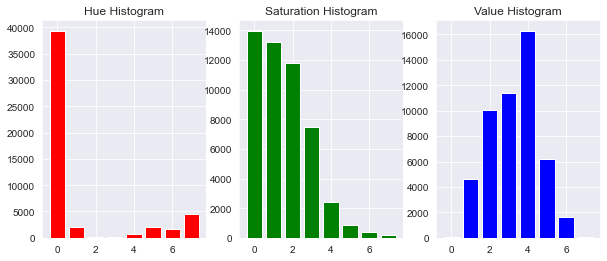

In [47]:
# Define the number of bins for the color histograms
bins = 8

# Convert the first image to the HSV color space
hsv = cv2.cvtColor(images[0], cv2.COLOR_RGB2HSV)

# Calculate the color histograms for each channel (H, S, V)
hist_h = cv2.calcHist([hsv], [0], None, [bins], [0, 180]).flatten()
hist_s = cv2.calcHist([hsv], [1], None, [bins], [0, 256]).flatten()
hist_v = cv2.calcHist([hsv], [2], None, [bins], [0, 256]).flatten()

# Plot the color histograms using matplotlib
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].bar(range(bins), hist_h, color='r')
axs[0].set_title('Hue Histogram')
axs[1].bar(range(bins), hist_s, color='g')
axs[1].set_title('Saturation Histogram')
axs[2].bar(range(bins), hist_v, color='b')
axs[2].set_title('Value Histogram')
plt.show()


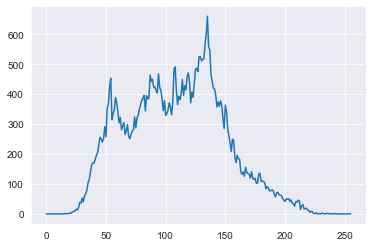

In [48]:
img = my_arrays_final['images'][0]

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Calculate histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Show histogram using matplotlib
plt.plot(hist)
plt.show()

In [49]:
images = my_arrays_final['images'][0]


[120.47880884 105.91931059  94.7284709 ]
[39.94860014 40.23595114 44.71204123]


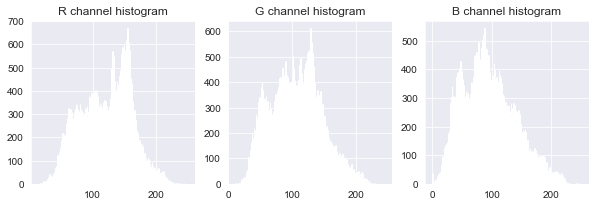

In [50]:
# calculate the mean pixel value for each channel
print(np.mean(images, axis=(0, 1))) # prints [R_mean, G_mean, B_mean]

# calculate the standard deviation of the pixel values for each channel
print(np.std(images, axis=(0, 1))) # prints [R_std, G_std, B_std]

# plot the histogram of pixel values for each channel
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for i, channel in enumerate(['R', 'G', 'B']):
    axs[i].hist(images[:,:,i].ravel(), bins=256)
    axs[i].set_title(f'{channel} channel histogram')
plt.show()


In [51]:
images = my_arrays_final['images']

In [52]:
# Create a SIFT object
sift = cv2.SIFT_create()

# Initialize empty lists to store keypoints and descriptors for each image
keypoints = []
descriptors = []

# Loop through each image in the data and extract SIFT features
for img in images:
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Detect keypoints and compute descriptors
    kp, des = sift.detectAndCompute(gray, None)
    # Append keypoints and descriptors to lists
    keypoints.append(kp)
    descriptors.append(des)

# Convert lists to numpy arrays
keypoints = np.array(keypoints)
descriptors = np.array(descriptors)

# Print the shape of keypoints and descriptors
print('Keypoints shape:', keypoints.shape)
print('Descriptors shape:', descriptors.shape)

# Use the keypoints and descriptors as features for a machine learning model


Keypoints shape: (7566,)
Descriptors shape: (7566,)


In [53]:
# !pip install opencv-contrib-python

In [54]:
img= my_arrays_final['images'][5000]

In [55]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp, des = sift.detectAndCompute(gray, None)

# Draw the keypoints on the image
img_with_keypoints = cv2.drawKeypoints(gray, kp, None)

# Show the image with keypoints
# cv2.imshow('Image with keypoints', img_with_keypoints)
cv2.imwrite("sift_3000.jpg", img_with_keypoints)

True